<a href="https://colab.research.google.com/github/sanmo33/auto_trello/blob/master/MyPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from PIL import Image
import numpy as np
from matplotlib import pylab as plt
import pandas as pd
import seaborn as sns
import sys
import cv2
import glob
from matplotlib.pyplot import imread
%matplotlib inline

In [89]:
import tqdm

In [90]:
clothes = pd.DataFrame([])

In [91]:
def add_to_clothes(path_name):
  clothes = pd.DataFrame([])
  for path in glob.glob(path_name+"/*.png"):
    img = imread(path)
    cloth = pd.Series(img.flatten(), name=path[34:])
    clothes = clothes.append(cloth)
  
  return clothes

In [92]:
path_list = ["/content/drive/MyDrive/iketeru", "/content/drive/MyDrive/puls_j_mens_result", "/content/drive/MyDrive/puls_j_ladies_result", "/content/drive/MyDrive/uniqlo_U_mens_result", "/content/drive/MyDrive/uniqlo_U_ladies_result", "/content/drive/MyDrive/zara_men_result", "/content/drive/MyDrive/zara_ladies_result"]

In [93]:
path_name_list_digit = []
for i in range(len(path_list)):
  digit = len(glob.glob(path_list[i]+"/*png"))
  name = path_list[i].replace('/content/drive/MyDrive/', '')
  tmp = [name for i in range(digit)]
  path_name_list_digit.extend(tmp)

In [94]:
for path in tqdm.tqdm(path_list):
  tmp = add_to_clothes(path)
  clothes = pd.concat([clothes, tmp])

100%|██████████| 7/7 [00:04<00:00,  1.45it/s]


In [95]:
clothes.shape

(207, 262144)

In [96]:
#feat_cols = ['pixel' + str(i) for i in range(clothes.shape[1])]

In [97]:
#clothes = pd.DataFrame(clothes, columns = feat_cols)

In [98]:
y_label = [0] * len(path_name_list_digit)

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [100]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(clothes.iloc[:,:-1])

In [101]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])

In [102]:
principal_cifar_Df['y'] = path_name_list_digit

In [103]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,63.841419,138.538544,iketeru
1,118.960854,14.223367,iketeru
2,-84.819229,15.729506,iketeru
3,123.995911,77.281715,iketeru
4,39.075558,99.543861,iketeru


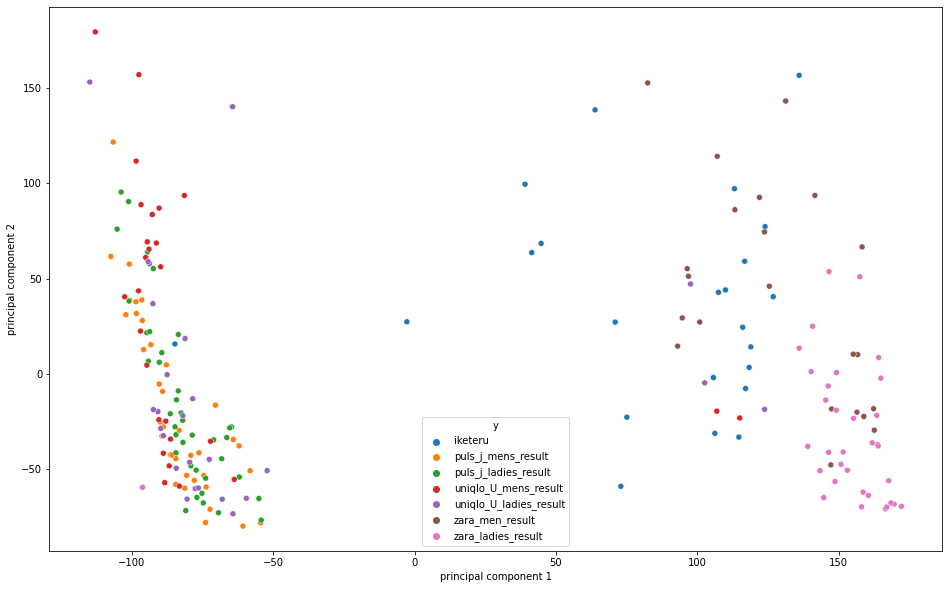

In [104]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    #palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=1
)